In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

构造人工数据集

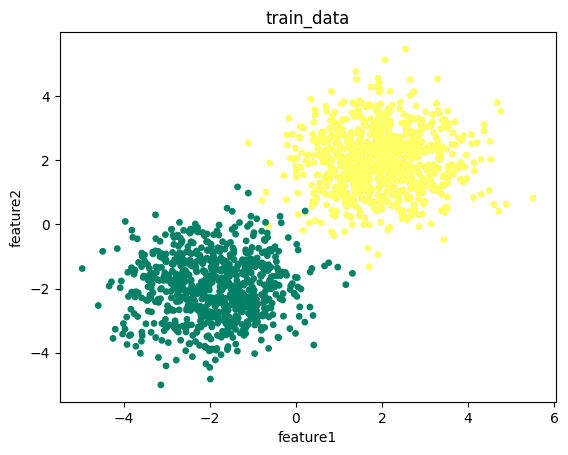

In [2]:
# 构造训练集
n_feature = 2
train_data_size = 800
n_data = torch.ones(train_data_size,n_feature)
x1 = torch.normal(2*n_data,1)
y1 = torch.ones(train_data_size)
x2 = torch.normal(-2*n_data,1)
y2 = torch.zeros(train_data_size)
train_feat = torch.cat((x1,x2),dim=0).type(torch.FloatTensor)
train_label = torch.cat((y1,y2),dim=0).type(torch.FloatTensor)
# 训练集可视化
plt.scatter(train_feat.data.numpy()[:,0],train_feat.data.numpy()[:,1],s=15,c=train_label.data.numpy(),marker='o', cmap='summer')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.title('train_data')
plt.show()

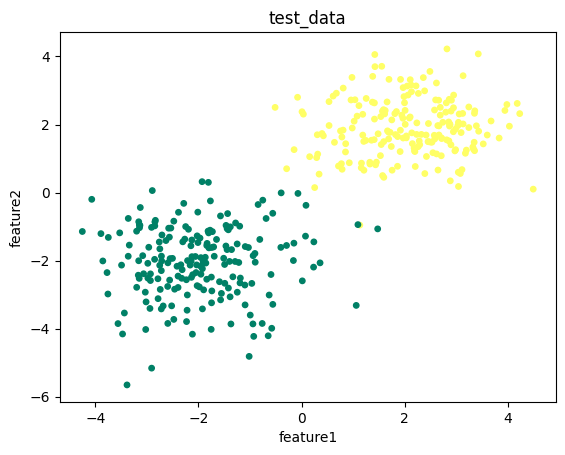

In [3]:
# 构造测试集
test_data_size = 200
n_data = torch.ones(test_data_size,n_feature)
x1 = torch.normal(2*n_data,1)
y1 = torch.ones(test_data_size)
x2 = torch.normal(-2*n_data,1)
y2 = torch.zeros(test_data_size)
test_feat = torch.cat((x1,x2),dim=0).type(torch.FloatTensor)
test_label = torch.cat((y1,y2),dim=0).type(torch.FloatTensor)
# 测试集可视化
plt.scatter(test_feat.data.numpy()[:,0],test_feat.data.numpy()[:,1],s=15,c=test_label.data.numpy(),marker='o', cmap='summer')
plt.xlabel('feature1')
plt.ylabel('feature2')
plt.title('test_data')
plt.show()


组合训练集和测试集的特征和标签，创建Dataloader数据迭代器

In [4]:
learning_rate = 0.01
batch_size = 10
train_data = TensorDataset(train_feat, train_label)
train_dl = DataLoader(train_data, batch_size=batch_size)
test_data = TensorDataset(test_feat, test_label)
test_dl = DataLoader(test_data, batch_size=batch_size)

搭建模型

In [5]:
from torch.nn import init
# 创建模型对象
# 初始化模型参数，包括线性层的权重和偏置


class LogisticNet(nn.Module):
    def __init__(self, n_feature):
        super(LogisticNet, self).__init__()
        self.linear = nn.Linear(n_feature, out_features=1)
        self.act = nn.Sigmoid()
    def forward(self, x):
        return self.act(self.linear(x))
    
model = LogisticNet(2)

init.normal_(model.linear.weight, mean=0, std=0.01)
init.constant_(model.linear.bias, val=0)

Parameter containing:
tensor([0.], requires_grad=True)

定义损失函数和优化器

In [6]:
# 损失函数-二进制交叉熵损失函数 
loss = nn.BCELoss()
# 优化器
opt = torch.optim.SGD(model.parameters(), lr=learning_rate)

测试集准确率评估

In [7]:
n_epoch = 10
for epoch in range(n_epoch):
    for X, y in train_dl:
        output = model(X)
        l = loss(output, y.view(-1, 1))
        opt.zero_grad() # 梯度清零
        l.backward()
        opt.step()
    print('epoch %d, loss: %f' % (epoch, l.item()))

epoch 0, loss: 0.186107
epoch 1, loss: 0.123602
epoch 2, loss: 0.097347
epoch 3, loss: 0.082434
epoch 4, loss: 0.072645
epoch 5, loss: 0.065642
epoch 6, loss: 0.060339
epoch 7, loss: 0.056155
epoch 8, loss: 0.052752
epoch 9, loss: 0.049917


模型训练测试

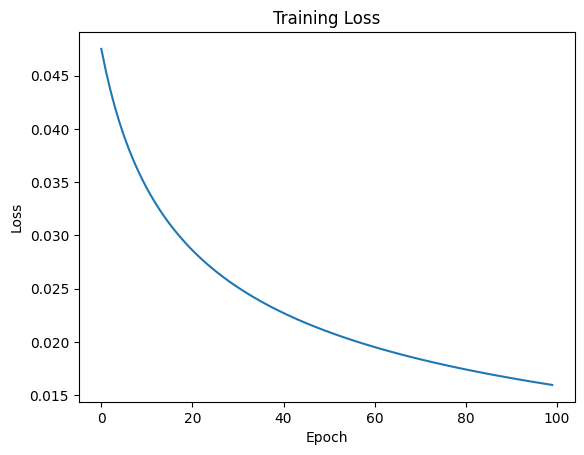

In [8]:
import numpy as np


n_epoch = 100
train_losses = np.zeros((2,n_epoch))
train_losses[0, :] = np.arange(n_epoch)
for epoch in range(n_epoch):
    for X, y in train_dl:
        output = model(X)
        l = loss(output, y.view(-1, 1))
        opt.zero_grad() # 梯度清零
        l.backward()
        opt.step()
    train_losses[1, epoch] = l.item()

# 绘制训练损失
plt.figure()
plt.plot(train_losses[0,:], train_losses[1,:])
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

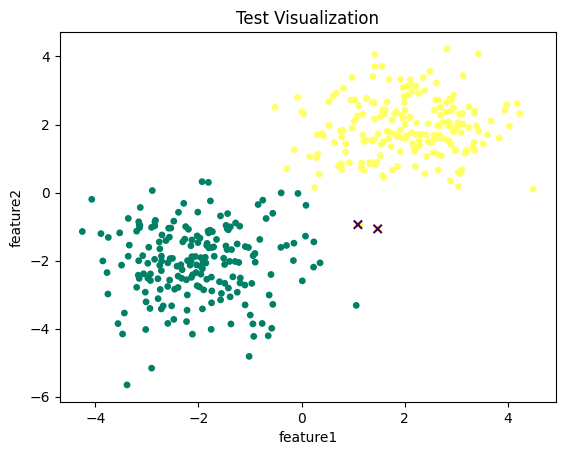

In [9]:
# 可视化

pred = model(test_feat)
pred_data = np.where(pred.detach().numpy() > 0.5, 1, 0)
pred_data = pred_data.reshape(test_label.shape)
mismatch = np.where(pred_data != test_label.detach().numpy())[0]

plt.scatter(test_feat.data.numpy()[:, 0], test_feat.data.numpy()[:, 1],s=15,c=pred_data,marker='o', cmap='summer')

plt.scatter(test_feat[mismatch].data.numpy()[:, 0],
            test_feat[mismatch].data.numpy()[:, 1],
            c=test_label[mismatch].data.numpy(), marker='x', label='Misclassified')

plt.xlabel('feature1')
plt.ylabel('feature2')
plt.title('Test Visualization')
plt.show()

实验结果分析

1. torch.nn提供了构建神经网络所需的基本模块，包括各种类型的层、损失函数等，极大便利了网络架构的设计。
2. 据实验结果，模型的收敛速度较快。模型在训练过程中，损失不会一直下降，会有波动，但总体是呈现下降趋势的。